In [ ]:
#AtomCamp AI Bootcamp Project
#Stock Price Prediction using RNN
#Fahad Aamir Shaikh

## **Project Overview**

Stock price prediction plays a crucial role in financial markets, and accurate forecasts can have significant implications for businesses, investors, and financial institutions.

Stock price prediction helps investors and fund managers make informed investment decisions. By accurately forecasting future stock prices, investors can identify potential opportunities for maximizing profits or minimizing losses. It enables them to allocate their capital wisely and adjust their investment portfolios based on predicted price movements.

## **Approach**
 Loading Time Series Data:
    * Obtain the time series data for stock prices from yahoo finance.


* Data Transformations:
    * Perform feature scaling or normalization to bring data into a consistent range.
    * Overlapping window creation for training.


* Recurrent Neural Networks:
    * Model Building and Training
    * Sequence Generation and Evaluation

## **Important Libraries**

* **TensorFlow**: TensorFlow is a popular open-source library for machine learning and deep learning. It provides a flexible framework for building and training various types of neural networks. Refer to the [TensorFlow documentation](https://www.tensorflow.org/) for more information.

* **Statsmodels**: Statsmodels is a Python module for statistical modeling and inference. It offers a wide range of statistical models, including linear regression, time series analysis, and hypothesis testing. Refer to the [Statsmodels documentation](https://www.statsmodels.org/) for more information.

* **NumPy**: NumPy is a fundamental library for scientific computing in Python. It provides support for large, multi-dimensional arrays and a collection of mathematical functions to manipulate and analyze the data efficiently. Refer to the [NumPy documentation](https://numpy.org/) for more information.

* **Scikit-learn**: Scikit-learn is a comprehensive machine learning library in Python. It offers various algorithms for classification, regression, clustering, and dimensionality reduction, along with utilities for model evaluation and preprocessing. Refer to the [scikit-learn documentation](https://scikit-learn.org/stable/) for more information.

* **Seaborn**: Seaborn is a data visualization library based on Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Refer to the [Seaborn documentation](https://seaborn.pydata.org/) for more information.

* **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Refer to the [Matplotlib documentation](https://matplotlib.org/) for more information.

* **Pandas**: Pandas is a powerful library for data manipulation and analysis in Python. Refer to the [Pandas documentation](https://pandas.pydata.org/) for more information.

* **yfinance**: yfinance is a library that provides an easy way to download historical market data from Yahoo Finance. Refer to the [yfinance GitHub repository](https://github.com/ranaroussi/yfinance) for more information.

* **pandas_datareader**: pandas_datareader is a library that allows easy access to online data sources, including Yahoo Finance, for retrieving financial data. Refer to the [pandas_datareader documentation](https://pandas-datareader.readthedocs.io/) for more information.

* **pandas_ta**: pandas_ta is a library that extends Pandas functionality with technical analysis indicators for financial data analysis. Refer to the [pandas_ta GitHub repository](https://github.com/twopirllc/pandas-ta) for more information.

In [1]:
#!pip install tensorflow==2.12.0
!pip install statsmodels==0.14.0
#!pip install numpy==1.23.5
#!pip install scikit-learn==1.2.2
#!pip install seaborn==0.12.2
#!pip install matplotlib==3.7.1
#!pip install pandas==2.0.2
!pip install yfinance==0.2.18
!pip install pandas_datareader==0.10.0
!pip install pandas_ta==0.3.14b

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.1
    Uninstalling statsmodels-0.14.1:
      Successfully uninstalled statsmodels-0.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 662.1 kB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.36
    Uninstalling yfinance-0.2.36:
      Successfully uninstalled yfinance-0.2.36
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=72bb22423afc661eb511fd76c12499531fa765d061522f324d2cd33bd7720cc9
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import pandas_ta as ta
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

In [3]:
#Customize Plot Appearance
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

##Loading Data

In [4]:
#using pandas data reader and get_data_yahoo wrapper
#the wrapper allows us to directly read from an API
#AAPL is apple's prices and we start from January of 2012 until today
dataset = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433824,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3052 entries, 2012-01-03 to 2024-02-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3052 non-null   float64
 1   High       3052 non-null   float64
 2   Low        3052 non-null   float64
 3   Close      3052 non-null   float64
 4   Adj Close  3052 non-null   float64
 5   Volume     3052 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 166.9 KB


#Plotting Training and Test Data

In [6]:
tstart = 2016
tend = 2020

In [7]:
def train_test_plot(dataset, tstart, tend):
    #We're using 2016 to 2020 as our Training set
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    #We're using 2020 onwards as our test set
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    #plot
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Apple stock price")
    plt.show()

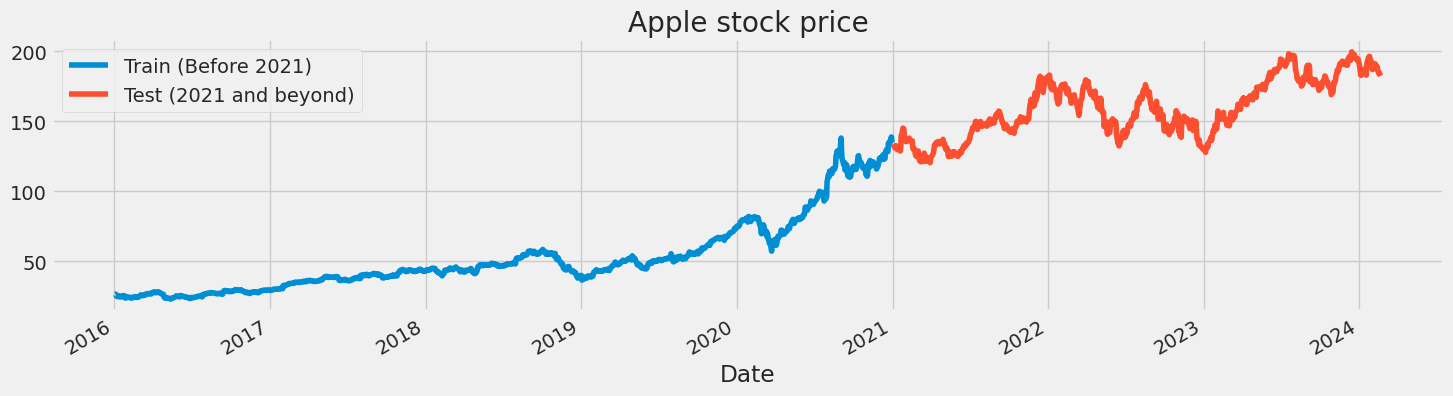

In [8]:
train_test_plot(dataset, tstart, tend)

## Creating test and train datasets

In [9]:
def train_test_split(dataset, tstart, tend, columns = ['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    return train, test

In [10]:
# from sklearn.model_selection import train_test_split
# training_set, test_set = train_test_split(dataset['High'], test_size=0.3, train_size=0.7, random_state=None, shuffle=False, stratify=None)

In [11]:
training_set, test_set = train_test_split(dataset, tstart, tend)

## Scaling Dataset Values

In [12]:
#Normalize data
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [13]:
training_set

array([[ 26.34250069],
       [ 26.46249962],
       [ 25.59250069],
       ...,
       [138.78999329],
       [135.99000549],
       [134.74000549]])

##Creating Overlapping Window Batches

In [14]:
n_steps = 1
features = 1
#

In [15]:
#to keep history of sequence, last value of sequence will be our label
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        #[2] is x, [3] is label or y
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        #if [2,3,4] is x
        X.append(seq_x)
        #then [5] is y
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [17]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

##Evaluation

In [18]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    plt.legend()
    plt.show()

In [19]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

## Vanilla RNN

In [20]:
def plot_loss(history):
    plt.figure(figsize = (15,10))
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='best')
    plt.show()

In [58]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=10, input_shape=(n_steps, features)))
model_rnn.add(Dense(units=1))

RMSprop (Root Mean Squared Propagation),

RMSprop is considered suitable for non-stationary time series data.

In [59]:
# Compiling the model
model_rnn.compile(optimizer="RMSprop", loss="mse")

In [60]:
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

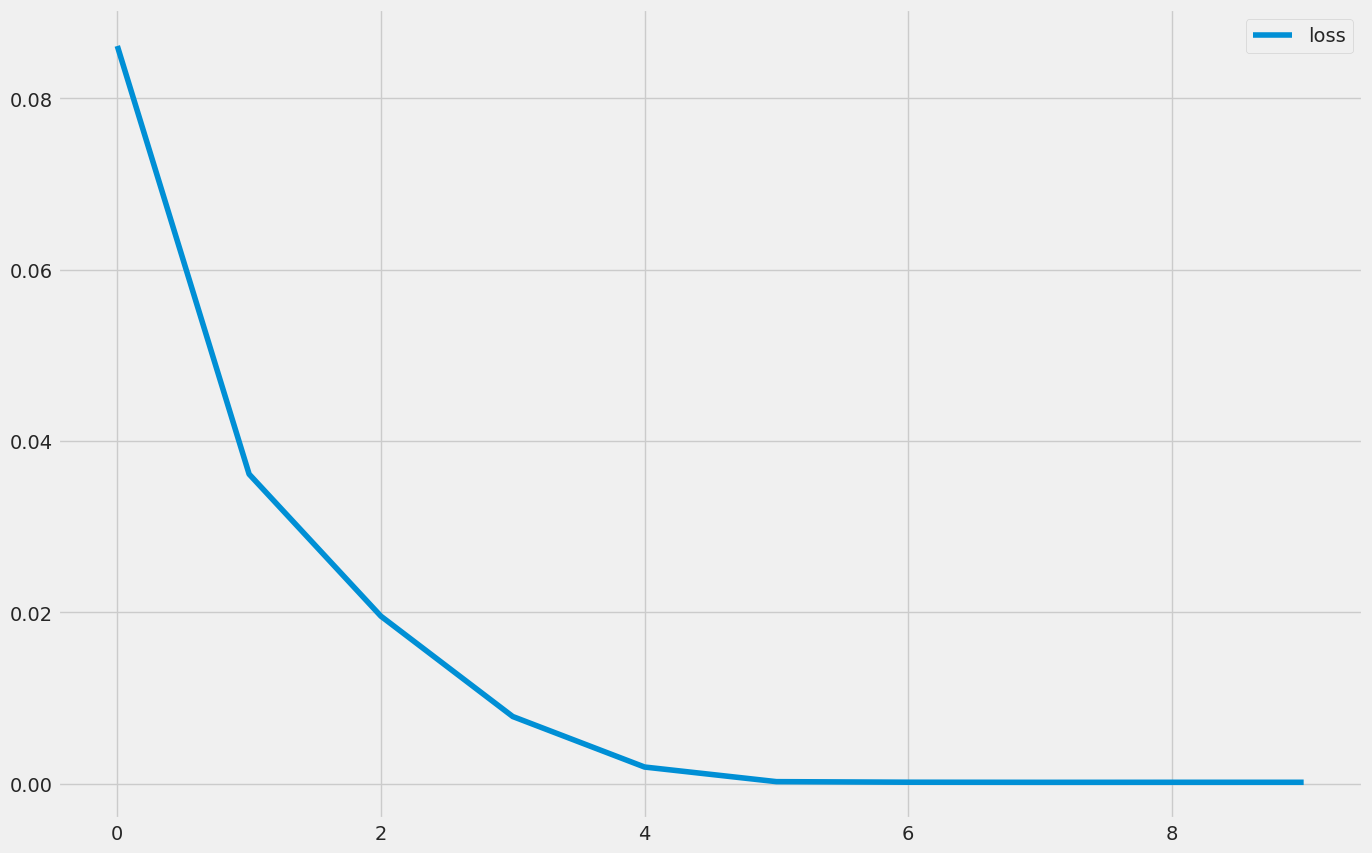

In [61]:
plot_loss(history)

#Time Series Prediction

In [62]:
# Scaling
inputs = sc.transform(test_set.reshape(-1, 1))

In [63]:
# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
X_test = X_test.reshape(-1, n_steps, features)

In [64]:
# Prediction
predicted_stock_price = model_rnn.predict(X_test)
# Inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

25/25 [==============================] - 0s 1ms/step


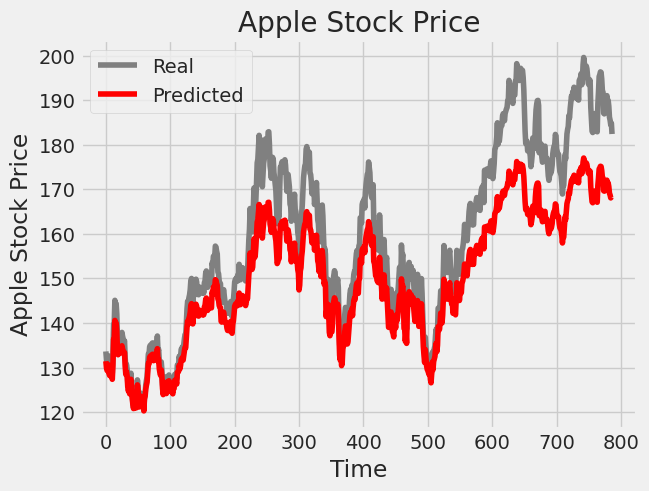

In [65]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")
#A plot of real vs predicted on our test dataset

Sequence Generation

In [66]:
#building a trend into the future
steps_in_future = 25

In [67]:
def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model:Sequential, steps_future: int):
    high_dataset = dataset.iloc[len(dataset) - len(test_set) - n_steps:]["High"]
    high_dataset = sc.transform(high_dataset.values.reshape(-1, 1))
    inputs = high_dataset[:n_steps]

    for _ in range(steps_future):
        curr_pred = model.predict(inputs[-n_steps:].reshape(-1, n_steps, features), verbose=0)
        inputs = np.append(inputs, curr_pred, axis=0)

    return sc.inverse_transform(inputs[n_steps:])

In [56]:
results = sequence_generation(dataset, sc, model_rnn, steps_in_future)

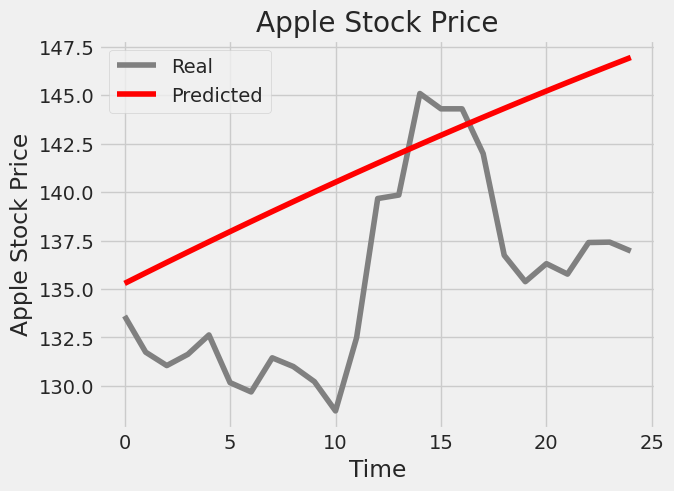

In [68]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

From here downwards, FAST API needs to be implemented to take the project forward. As I need some assistance from the instructors, this part will be done later.

In [69]:
import joblib

In [70]:
filename = 'finalized_model.sav'
joblib.dump(model_rnn,filename)

['finalized_model.sav']

In [71]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [36]:
!ngrok config add-authtoken 2cd7Vs8tQq4YqM0FHWSOFUvKDLS_2giENqTgJVqrKtSWSrjcN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [37]:
# from fastapi import FastAPI
# import nest_asyncio
# from pyngrok import ngrok
# import uvicorn

# app=FastAPI()

# @app.get("/mlmodel")
# async def mlmodel():
#   loaded_model = joblib.load('/content/finalized_model.sav')

#   return {"Hello": "World"}

# ngrok_tunnel = ngrok.connect(8001)
# print('Public URL:', ngrok_tunnel.public_url)
# nest_asyncio.apply()
# uvicorn.run(app, port=8001)

IndentationError: unexpected indent (<ipython-input-37-27ab6851b32f>, line 12)